In [1]:
from scipy import stats
from scipy.stats import t, sem
from random import shuffle
from statistics import mean
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings
import math

In [2]:
n=0

file0=open('Alfonso.txt','r')
for linea in file0.readlines():
    n+=1
file0.close()

A= []

file01=open('Alfonso.txt','r')

for i in range(n):
    infile01=list(file01.readline())
    A.append(infile01[:1][0])
file01.close()


auxtable= []

file02 = open('Alfonso1.txt','r')
for i in range(n):
    infile02=(list(map(float,(file02.readline().split()))))
    auxtable.append(infile02[:1][0])
file02.close()

Atable = [] # lista de tiempos de llegada del primer trabajador
Atable1 = []
Stable = [] # lista de tiempos de servicio del primer trabajador
Dtable = [] # lista de tiempos de demora del primer trabajador

c = - 1.13

for i in range(len(A)):
    c += auxtable[i]
    if(A[i] == 'P' or A[i] == 'L'):
        Atable.append(c)
        Stable.append(auxtable[i])

Ctable = [0.0 for i in range(len(Atable))]

for i in range(len(Atable)):

    if (Atable[i] < Ctable[i-1]):
        Dtable.append(Ctable[i-1]-Atable[i])
    else:
        Dtable.append(0.0)
        
    Ctable[i]= Atable[i]+Stable[i]+Dtable[i]


for i in range(len(Atable)):
    if(i == 0):
        Atable1.append(Atable[i])
    else:
        Atable1.append(Atable[i] - Atable[i-1])



In [3]:
d = {'T. Llegada A.':Atable,'T. Llegada I.':Atable1,'T. Servicio':Stable}   #creo un dicionario y lo convierto en data frame 
Alf_df = pd.DataFrame(d)

Ap25 = Alf_df['T. Llegada I.'].quantile(0.25)
Ap75 = Alf_df['T. Llegada I.'].quantile(0.75)
Sp25 = Alf_df['T. Servicio'].quantile(0.25)
Sp75 = Alf_df['T. Servicio'].quantile(0.75)
Alf_final = Alf_df[(Alf_df['T. Llegada I.'] >= Ap25) & (Alf_df['T. Llegada I.'] <= Ap75) & (Alf_df['T. Servicio'] >= Sp25)  & (Alf_df['T. Servicio'] <= Sp75)]


Atable = list(Alf_final['T. Llegada A.'])
Atable1 = list(Alf_final['T. Llegada I.'])
Stable = list(Alf_final['T. Servicio'])

Alf_final



,T. Llegada A.,T. Llegada I.,T. Servicio
1,1.25,1.25,1.25
2,2.85,1.60,1.60
5,34.82,3.91,1.47
6,38.75,3.93,0.98
9,46.02,1.09,1.09
20,229.01,1.72,1.07
24,238.08,1.60,1.09
27,249.66,1.68,1.68
28,250.78,1.12,1.12
36,281.26,1.71,1.71


********Autocorrelación de tiempos de llegada*****************************************


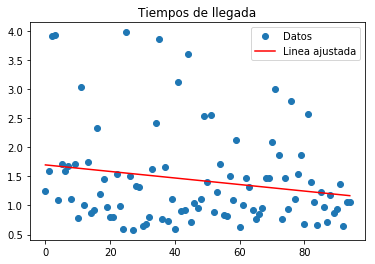

P-Valor de tiempos de llegada: 0.06658857595804035
Se cumple la hipótesis alternativa 
 

CONJUNTO DE PUNTOS

[ 1.          0.01433234  0.00498578  0.00808808 -0.109811   -0.01141008
 -0.02845834  0.0277282   0.00782827  0.20117743  0.15451046 -0.19173757
 -0.07976278 -0.08520187 -0.01746715 -0.07495311  0.00205832 -0.09734864
 -0.06112555  0.10662728 -0.09074477 -0.1683896   0.09291816  0.05547374
  0.06023423 -0.04618596  0.04197309 -0.00718112  0.05443756 -0.11491365
  0.03313323 -0.0628397   0.16160256  0.11088995 -0.01593139  0.05028597
 -0.04636031  0.07530515  0.05838161 -0.03988472 -0.07310959]


/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


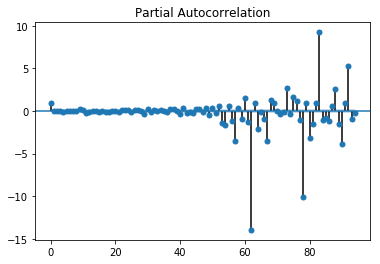


 

********Autocorrelación de tiempos de servicio*****************************************


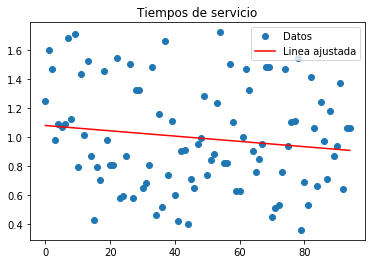

P-Valor de tiempos de servicio: 0.17258290869018275
Se cumple la hipótesis alternativa 
 

CONJUNTO DE PUNTOS

[ 1.         -0.00252479 -0.00373995 -0.16241039  0.13846934  0.05519797
  0.08693313  0.03192918  0.00350796  0.096547   -0.04013588  0.11452987
 -0.11696395 -0.06887569 -0.04041252  0.12384242 -0.07285746  0.04012161
 -0.26748459  0.02507174  0.19028436  0.09236724 -0.13515786 -0.20773742
  0.07459088  0.05191516  0.08556999 -0.11907088  0.09715181  0.05470844
 -0.06127214  0.01981602 -0.03944742 -0.1614803  -0.10424334  0.0157851
  0.09395925 -0.06638012 -0.16321144 -0.05438826  0.04372814]


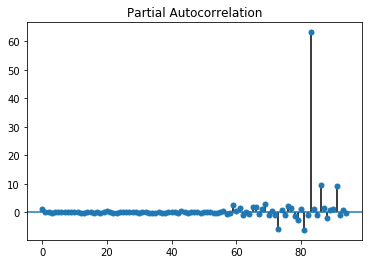

In [4]:
# se grafican los datos y la linea ajustada
x1 = np.array([i for i in range(len(Atable1))])
pendiente1, intercepto1, r_valor1, p_valor1, std_error1 = stats.linregress(x1, Atable1)

print("********Autocorrelación de tiempos de llegada*****************************************")
plt.plot(x1, Atable1, 'o', label='Datos')
plt.plot(x1, intercepto1 + pendiente1*x1, 'r', label='Linea ajustada')
plt.title("Tiempos de llegada")
plt.legend()
plt.show()



print("P-Valor de tiempos de llegada:",p_valor1)
# se determina la autocorrelacion
if(p_valor1>0.05):
    print("Se cumple la hipótesis alternativa \n \n")
    r1 = (np.correlate(x1-x1.mean(),x1-x1.mean(), mode='full'))/(x1.var()*len(x1))
    autocorr1= r1[r1.size//2:]
    # print("Autocorrelación:",autocorr1, "\n \n")
    print ("CONJUNTO DE PUNTOS\n")
    print (sm.graphics.tsa.acf(Atable1))
    sm.graphics.tsa.plot_pacf(Atable1, lags = len(Atable1), alpha = 0.05)
    plt.show()   
    print("\n \n")

else:
    print("Hipótesis nula, P-Valor es menor que 0.05 \n \n")




# se grafican los datos y la linea ajustada
x2 = np.array([i for i in range(len(Stable))])
pendiente2, intercepto2, r_valor2, p_valor2, std_error2 = stats.linregress(x2, Stable)

print("********Autocorrelación de tiempos de servicio*****************************************")
plt.plot(x2, Stable, 'o', label='Datos')
plt.plot(x2, intercepto2 + pendiente2*x2, 'r', label='Linea ajustada')
plt.title("Tiempos de servicio")
plt.legend()
plt.show()


print("P-Valor de tiempos de servicio:",p_valor2)
# se determina la autocorrelacion
if(p_valor2>0.05):
    print("Se cumple la hipótesis alternativa \n \n")
    r2 = (np.correlate(x2-x2.mean(),x2-x2.mean(), mode='full'))/(x2.var()*len(x2))
    autocorr2= r2[r2.size//2:]
   # print("Autocorrelación:",autocorr2, "\n \n")
    print ("CONJUNTO DE PUNTOS\n")
    print (sm.graphics.tsa.acf(Stable))
    sm.graphics.tsa.plot_pacf(Stable, lags = len(Stable), alpha = 0.05)
    plt.show()
    
    print("\n \n")

else:
    print("Hipótesis nula, P-Valor es menor que 0.05 \n \n")




In [5]:
distribuciones = [
        "exponnorm",
        "norm",            #Normal (Gaussian)
        "alpha",           #Alpha
        "anglit",          #Anglit
        "beta",            #Beta
        "betaprime",       #Beta Prime
        "bradford",        #Bradford
        "burr",            #Burr
        "cauchy",          #Cauchy
        "chi2",            #Chi-squared
        "cosine",          #Cosine
        "dgamma",          #Double Gamma
        "dweibull",        #Double Weibull
        "expon",           #Exponential
        "exponweib",       #Exponentiated Weibull
        "gamma",
        "kstwobign",       #Kolmogorov-Smirnov two-sided test for Large N
        "lognorm"
    ] 

In [6]:
arrivesDistributionResults = []
for distName in distribuciones:
    dist = getattr(stats, distName)
    fittedData = dist.fit(Atable1)
    D, p = stats.kstest(Atable1, distName, args=fittedData);
    arrivesDistributionResults.append((distName,p,fittedData))
auxP = 0
arrivesAuxDist = ""
print("P Values for each distribution and fit parameter: \n")
for distribution in arrivesDistributionResults:
    print("{}: {}".format(distribution[0], distribution[1]))
    if(auxP<distribution[1]):
        arrivesAuxDist = distribution[0]
        auxP = distribution[1]
        arrivesAuxParams = distribution[2]
print("\nThe correct distribution for the dataset is {0} as it has the highest p value ({1}).".format(arrivesAuxDist,auxP))

/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/ralphsliger/anaconda3/envs/acamica/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/ralph

P Values for each distribution and fit parameter: 

exponnorm: 0.7024553751259894
norm: 0.01061273774174309
alpha: 0.8803110215872241
anglit: 3.473609043498688e-05
beta: 0.012236544431403408
betaprime: 0.9236610819866544
bradford: 1.05676617544515e-08
burr: 0.8901167428124573
cauchy: 0.003419370729897085
chi2: 0.8260777752016002
cosine: 3.7724258172707487e-07
dgamma: 0.008255030115771127
dweibull: 0.0005527361924380816
expon: 0.7757107203601341
exponweib: 0.7738546015827963
gamma: 0.8261012148144368
kstwobign: 0.022081372515325666
lognorm: 0.98693388548311

The correct distribution for the dataset is lognorm as it has the highest p value (0.98693388548311).


In [7]:
servicesDistributionResults = []
for distName in distribuciones:
    dist = getattr(stats, distName)
    fittedData = dist.fit(Stable)
    D, p = stats.kstest(Stable, distName, args=fittedData);
    servicesDistributionResults.append((distName,p,fittedData))
auxP = 0
servicesAuxDist = ""
print("P Values for each distribution:\n")
for distribution in servicesDistributionResults:
    print("{}: {}".format(distribution[0], distribution[1]))
    if(auxP<distribution[1]):
        servicesAuxDist = distribution[0]
        auxP = distribution[1]
        servicesAuxParams = distribution[2]
print("\nThe correct distribution for the dataset is {0} as it has the highest p value ({1}).".format(servicesAuxDist,auxP))

P Values for each distribution:

exponnorm: 0.5440644700345597
norm: 0.5409289129351013
alpha: 0.6137622683857026
anglit: 0.31388265914649793
beta: 0.5384925732617998
betaprime: 0.7027605769656073
bradford: 0.19569925988369646
burr: 0.22047804117985445
cauchy: 0.10435266127897613
chi2: 8.937883237037111e-05
cosine: 0.5823599459853904
dgamma: 0.31413633219888026
dweibull: 0.16713573604699075
expon: 0.0008323214139217461
exponweib: 0.27491207884203456
gamma: 0.7211198030133191
kstwobign: 0.7865689439295052
lognorm: 0.6521091680591757

The correct distribution for the dataset is kstwobign as it has the highest p value (0.7865689439295052).


# 

In [8]:
arrivalsDist = getattr(stats, arrivesAuxDist)
servicesDist = getattr(stats, servicesAuxDist)

In [9]:
print(arrivesAuxParams)
print(arrivesAuxParams[-1])
print(arrivesAuxParams[-2])

(0.859266735713283, 0.49734819461912483, 0.6610137690085853)
0.6610137690085853
0.49734819461912483


In [21]:

def generateArrivalAndServiceTimes():
    workingDay = 9*60 #9 hours expressed in minutes.
    arrivals = [0] #This will contain the arrival times for n works in a day.
    services = [0] #This will contain the service times for n works in a day.
    totalAmountOfHours = 0
    while totalAmountOfHours < workingDay:
        nArrivalTime = arrivalsDist.rvs(arrivesAuxParams[-2], arrivesAuxParams[-1])
        nServiceTime = servicesDist.rvs(servicesAuxParams[-2], servicesAuxParams[-1])
        totalAmountOfHours += nServiceTime
        arrivals.append(nArrivalTime)
        services.append(nServiceTime)
    a = [arrivals, services]
    return a

In [22]:


j=[]

def charge():
    alamda=5/10
    slamda=6/10
    x=0.0
    a=[]
    while x<=205:
        service= distStable.rvs(loc=paramStable[-2], scale=paramStable[-1])
        a.append([float(x),float(service)])
        x+=distAtable.rvs(loc=paramAtable[-2], scale=paramAtable[-1])	
    return a

def replica():
    data=charge()
    i=0
    c=0.0
    l=len(data)
    j.append(l)
    while (i<l):
        a=data[i][0]
        if(a<c):
            data[i].append(c-a)
        else:data[i].append(0.0)
        c=data[i][0]+data[i][1]+data[i][2]
        i+=1
    sp=0.0
    dp=0.0
    wp=0.0
    for a,s,d in data:
        sp+=s
        dp+=d
        wp+=s+d
    #job-average statistic
    sp/=l				#Average service time
    spi=1/sp			#service rate
    rp=data[-1][0]/l	#Average interarrival time
    rpi=1/rp			#arival rate
    dp/=l				#average delay
    wp/=l				#average wait time
    #time-average statistic
    tn=(l/c)*wp			#node
    tq=(l/c)*dp			#queue
    ts=(l/c)*sp			#service
    
    return [sp,spi,rp,rpi,dp,wp,tn,tq,ts]

def confidence(array):
    n = len(array)
    m = mean(array)
    error = sem(array)
    h = error*t.ppf((1+0.95)/2,n-1)
    start = m-h
    end = m+h
    interval = [start,end]

    return interval 

    
if __name__=='__main__':
    
    
    b = generateArrivalAndServiceTimes()
    print(b)
    
    
    """
    p=[]
    n=10
    for i in range(n):
        p.append(replica())
        
    asp=0.0; aspi=0.0; arp=0.0; arpi=0.0; adp=0.0; awp=0.0; atn=0.0 ;atq=0.0; ats=0.0
    
    asp_c = []; aspi_c = []; arp_c = []; arpi_c = []; adp_c = []; awp_c = []; atn_c = []; atq_c =[]; ats_c = []
 
    for sp,spi,rp,rpi,dp,wp,tn,tq,ts in p:
        asp+=sp
        aspi+=spi
        arp+=rp
        arpi+=rpi
        adp+=dp
        awp+=wp
        atn+=tn
        atq+=tq
        ats+=ts
        
        asp_c.append(sp)
        aspi_c.append(spi)
        arp_c.append(rp)
        arpi_c.append(rpi)
        adp_c.append(dp)
        awp_c.append(wp)
        atn_c.append(tn)
        atq_c.append(tq)
        ats_c.append(ts)
        
        
    asp/=n
    aspi/=n
    arp/=n
    arpi/=n
    adp/=n
    awp/=n
    atn/=n
    atq/=n
    ats/=n
    
    
    print("\n\t\t *** NON-CONFIDENCE STATISTICS: *** \n")
    print("\n\t\tJob-Average Statistics: \n")
    print("\tAverage service time:\t\t",asp)
    print("\tService rate:\t\t\t",aspi)
    print("\tAverage interarrival time: \t",arp)
    print("\tArival rate:  \t\t\t",arpi)
    print("\tAverage delay:\t\t\t",adp)
    print("\tAverage wait time:\t\t",awp)
    print("\n\t\tTime-Average Statistics: \n")
    print("\tnode: \t\t",atn)
    print("\tqueue: \t\t",atq)
    print("\tservice: \t",ats)
    
    print("\n\t\t *** 95% CONFIDENCE STATISTICS: *** \n")
    print("\n\t\tJob-Average Statistics: \n")
    print("\tAverage service time:\t\t",confidence(asp_c))
    print("\tService rate:\t\t\t",confidence(aspi_c))
    print("\tAverage interarrival time: \t",confidence(arp_c))
    print("\tArival rate:  \t\t\t",confidence(arpi_c))
    print("\tAverage delay:\t\t\t",confidence(adp_c))
    print("\tAverage wait time:\t\t",confidence(awp_c))
    print("\n\t\tTime-Average Statistics: \n")
    print("\tnode: \t\t",confidence(atn_c))
    print("\tqueue: \t\t",confidence(atq_c))
    print("\tservice: \t",confidence(ats_c), "\n")
    
"""

[[0, 2.8926702381206564, 2.171564464253829, 2.043208976638888, 1.7424791253058063, 1.9853175959911193, 2.544930189517721, 1.8533038256930905, 1.5615288631202144, 1.4284461567763909, 1.5428963755551783, 1.6035785706581898, 5.248801302536892, 1.059891280168504, 1.8953832365213403, 1.3094640542516645, 1.5948017923895628, 2.1253215770946037, 1.6658786406928687, 1.4260994481964195, 2.071171740546931, 1.1299128503146563, 1.505694100753722, 1.5103471463935976, 1.1303911718923842, 1.7375034698030616, 1.3662208221580183, 1.8326804853199867, 0.9907874856868117, 1.4476580187933572, 1.187857522469568, 1.264238002871641, 1.1688367180139938, 1.4864296182294, 1.8882352971440184, 1.3276481903712638, 1.7091818671731402, 3.4113208511751387, 1.4213833117266956, 1.6662047041189088, 1.4209813077559454, 1.7190773118457465, 3.4419216590856867, 1.5752133690321375, 4.659052349743275, 1.4501256198268226, 1.833514952673675, 1.9011147988950077, 2.4810950081426997, 1.6151380958077948, 1.6792733568490177, 1.7127029